# data.world datacamp tutorial

> #### Setup  

> Before running data.world notebooks for the first time, you'll need to:  
1. Install data.world's Python package, including optional `pandas` dependencies: 
```shell
pip install datadotworld[pandas]
```
1. Obtain an API access token at https://data.world/settings/advanced
1. Store API access token using the `dw` command-line tool: 
```shell
dw configure
```

3 ) Copy/Paste in your data.world API token when prompted. Find your token at https://data.world/settings/advanced

We've also included one final code example here that shows some more ways to inspect a dataset, so check it out and just click submit to finish the course. We hope you enjoyed it!

> Once your environment is set up, these steps do not need to be repeated for other data.world notebooks.

In [6]:
# Import the datadotworld module as dw and the sys module
import datadotworld as dw
import sys
import pprint as pp

# Import a dataset
refugee_dataset = dw.load_dataset('nrippner/refugee-host-nations')

# Get the size of the dataset:
print(" ")
print('The Size of the DataSet= {0}'.format(sys.getsizeof(refugee_dataset)))
print(" ")

# List all of the data files:
dataframes = refugee_dataset.dataframes
print(" ")
for df in dataframes:
    pp.pprint(df)
print(" ")
    
# print all of the files in a dataset:
resources = refugee_dataset.describe()['resources']
pp.pprint('name:')

for r in resources:
    pp.pprint(r['name'])

print(" ")

pp.pprint('/n type of file:')

for r in resources:
    pp.pprint(r['format'])


 
The Size of the DataSet= 56
 
 
u'refugees_all_years'
u'unhcr_all'
u'worldbank_indicators'
u'refugees_per_capita'
u'unhcr_2015'
u'refugees2011_15'
u'worldbank_data_dict'
 
'name:'
u'refugees2011_15'
u'refugees_all_years'
u'refugees_per_capita'
u'unhcr_2015'
u'unhcr_all'
u'worldbank_data_dict'
u'worldbank_indicators'
u'original/Refugees.ipynb'
u'original/refs.py'
u'original/refugees2011-15.csv'
u'original/refugees_all_years.csv'
u'original/refugees_per_capita.csv'
u'original/unhcr_2015.csv'
u'original/unhcr_all.csv'
u'original/worldbank_data_dict.csv'
u'original/worldbank_indicators.csv'
 
'/n type of file:'
u'csv'
u'csv'
u'csv'
u'csv'
u'csv'
u'csv'
u'csv'
u'ipynb'
u'py'
u'csv'
u'csv'
u'csv'
u'csv'
u'csv'
u'csv'
u'csv'


In [7]:
# import datadotworld module and pp.pprint

import datadotworld as dw
import os
import pprint as pp

In [8]:
# import matplotlib for plots

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# load_dataset examples

dataset = dw.load_dataset('https://data.world/stephen-hoover/chicago-city-council-votes')

In [10]:
# describe examples: describe dataset

dataset.describe()

{u'description': u'Chicago city council voting records from May 2006 to March 2017\n\n# About this project\nThis dataset aims to increase transparency into the Chicago city government by publishing each Alderman\'s voting record in an easily machine-readable format. These data come from pdfs [published by the Office of the City Clerk](http://www.chicityclerk.com/legislation-records/journals-and-reports/council-meeting-reports).\n\nThis work was done as part of the Data for Democracy ["Chicago Lobbyists"](https://data.world/lilianhj/chicago-lobbyists) project.\n\nThe code which produced these data is at https://github.com/stephen-hoover/data-processing/blob/master/scraping/Scrape%20Chicago%20City%20Clerk%20Website.ipynb .\n\n# Still to-do\nIt would be useful to include more information about each measure -- sponsors, full text, and subject tags would be particularly good to have.\n\nAldermen names in the voting records are not fully standardized yet. Ideally the same person would always

In [11]:
# describe examples: describe specific dataset resource

dataset.describe('alderman_votes')

{u'format': u'csv',
 u'name': u'alderman_votes',
 u'path': u'data/alderman_votes.csv',
 u'schema': {u'fields': [{u'description': u'Note that some entries contain a full name and others only have a last name.',
    u'name': u'alderman',
    u'rdfType': u'http://www.w3.org/2001/XMLSchema#string',
    u'title': u'Alderman',
    u'type': u'string'},
   {u'description': u'VOTE KEY: Y=Yes; N=No; A=Absent; NV=Not Voting;  E=Excused; V=Vacant R=Recusals from voting',
    u'name': u'vote',
    u'rdfType': u'http://www.w3.org/2001/XMLSchema#string',
    u'title': u'Vote',
    u'type': u'string'},
   {u'name': u'ward',
    u'rdfType': u'http://www.w3.org/2001/XMLSchema#integer',
    u'title': u'Ward',
    u'type': u'integer'},
   {u'description': u'YYYY-MM-DD',
    u'name': u'date',
    u'rdfType': u'http://www.w3.org/2001/XMLSchema#date',
    u'title': u'Date',
    u'type': u'date'},
   {u'name': u'record',
    u'rdfType': u'http://www.w3.org/2001/XMLSchema#string',
    u'title': u'Record',
    

In [12]:
# Accessing the data
## After loading a dataset object, you can access the data via: `raw_data`, `tables`, or `dataframes`.
## Each of these returns a dictionary of values: `bytes`, `list` and `pandas.DataFrame` objects, respectively.

votes_dataframe = dataset.dataframes['alderman_votes']
votes_dataframe.head(3)

,alderman,vote,ward,date,record
0,Manuel Flores,N,1,2006-07-26,SO2006-3086
1,Madeline L. Haithcock,N,2,2006-07-26,SO2006-3086
2,Dorothy J. Tillman,N,3,2006-07-26,SO2006-3086


In [13]:
# Working with multiple datasets

# Load two datasets from data.world that you'd like to merge:
int_dataset = dw.load_dataset('https://data.world/jonloyens/intermediate-data-world')
fipsCodes_dataset = dw.load_dataset('https://data.world/uscensusbureau/fips-state-codes')

# Create two dataframes
police_shootings = int_dataset.dataframes['fatal_police_shootings_data']
state_abbrvs = fipsCodes_dataset.dataframes['statesfipscodes']

## Merge the two datasets together on the state and stusab fields:
merged_dataframe = police_shootings.merge(state_abbrvs, how = 'left', left_on = 'state', right_on='stusab')

## Create a 'citystate' column in the merged_dataframe dataframe with the format `city, state_name`:
merged_dataframe["citystate"] = merged_dataframe["city"] + ", " + merged_dataframe["state_name"]

## Print head of merged dataframe
pp.pprint(merged_dataframe.head(5))

   id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                    True       attack   
1      M    W          Aloha    OR                   False       attack   
2      M    H        Wichita    KS                   False        other   
3      M    W  San Francisco    CA                    True       attack   
4      M    H          Evans    CO                   False       attack   

          flee body_camera  state_fips stusab  state_name  statens  \
0  Not fleeing  

C:\Users\iabualhaol\AppData\Local\Continuum\Anaconda2\lib\site-packages\datadotworld\models\dataset.py:192: UserWarning: Unable to set data frame dtypes automatically using fatal_police_shootings_data schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 5
  'Error: {}'.format(resource_name, e))


In [14]:
# Querying data.world via SDK
## Query using SQL or SPARQL query languages. SQL is default, or add `query_type='sparql'` as a parameter for SPARQL. 
## The `query()` method gives you access to three properties to access the resulting data: `raw_data`, `table`, and `dataframe`.

# SQL

## Single table query exercise

# Define query string
sql_query = "SELECT * FROM `unhcr_all` WHERE Year = 2010"

# Query table, passing query string as parameter
query2010 = dw.query('https://data.world/nrippner/refugee-host-nations', sql_query)

# Create dataframe using dataframe property
unhcr2010 = query2010.dataframe

# Print first 5 rows of results
unhcr2010.head(5)

,asylum_seekers_pending_cases,country_territory_of_asylum_residence,internally_displaced_persons_idps,origin,others_of_concern,refugees_incl_refugee_like_situations,returned_idps,returned_refugees,stateless_persons,total_population,year
0,1,Aruba,NaN,Colombia,None,None,NaN,None,None,1,2010
1,None,Afghanistan,351907.0,Afghanistan,838250,None,3366.0,None,None,1193523,2010
2,21,Afghanistan,NaN,Iran (Islamic Rep. of),None,30,NaN,None,None,51,2010
3,0,Afghanistan,NaN,Iraq,None,6,NaN,None,None,6,2010
4,9,Afghanistan,NaN,Pakistan,None,6398,NaN,None,None,6407,2010


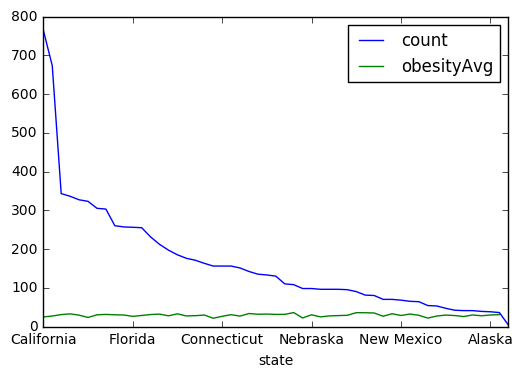

In [15]:
# SQL

## Multi-table join exercise

# Define query string. Note that secondary table and fields are explicitly referenced using dataset key (ownerid/tableid)
sql_query = "SELECT state, count(fmid) as count, Avg(obesity.Value) as obesityAvg FROM Export LEFT JOIN health.`obesity-by-state-2014`.`adult_obese` as obesity ON state = obesity.location GROUP BY state ORDER BY count desc"

# Query 'local' table, passing query string as parameter
queryResults = dw.query('https://data.world/agriculture/national-farmers-markets', sql_query)

# Create dataframe using dataframe property
stateStats = queryResults.dataframe

# Plot results on state
stateStats.plot(x='state')

In [16]:
# SPARQL
## Learn SPARQL using our tutorial at https://docs.data.world/documentation/api/sparql.html

# Define query string
sparql_query = "PREFIX GOT: <https://tutorial.linked.data.world/d/sparqltutorial/> SELECT ?FName ?LName WHERE {?person GOT:col-got-house \"Stark\" . ?person GOT:col-got-fname ?FName . ?person GOT:col-got-lname ?LName .}"

# Query table, passing query string and `query_type` as parameters
queryResults = dw.query('http://data.world/tutorial/sparqltutorial', sparql_query, query_type='sparql')

# Create dataframe using dataframe property
houseStark = queryResults.dataframe

# Print first 5 rows of results
pp.pprint(houseStark)


    FName  LName
0    Robb  Stark
1     Jon   Snow
2   Sansa  Stark
3    Arya  Stark
4    Bran  Stark
5  Rickon  Stark


## Advanced SDK Functionality

The data.world Python SDK includes a variety of API wrappers, available via the `ApiClient` class, that let you create, replace, update, and delete a dataset. In this section, we’ll walk through a few common tasks:

- Use `api_client()` to get an instance of the `ApiClient`
- Create a dataset
- Add a file from a dataframe: we’ll write to a local csv and the upload the file
- Add a file from a source URL: this is an easy way to add external data to your dataset and keep it up to date. We’ll use a file from GitHub as an example, but you can use any URL source that points to a file.
- Sync the dataset: this simple call reloads any files with a source URL, to ensure the latest version.
- Update the dataset: after creating a dataset, use `update_dataset` to change attirbutes like description, summary or tags.

Use `help(api_client)` to learn more about each available function or see the full [data.world API documentation](https://docs.data.world/documentation/api/).


In [17]:
# Create an instance of the ApiClient using `api_client()`
api_client = dw.api_client()

# See api_client documentation
help(api_client)

Help on RestApiClient in module datadotworld.client.api object:

class RestApiClient(__builtin__.object)
 |  REST API client
 |  
 |  Parameters
 |  ----------
 |  profile : str, optional
 |      Name of the configuration profile to use
 |  
 |  Methods defined here:
 |  
 |  __init__(self, config)
 |  
 |  add_files_via_url(self, dataset_key, files={})
 |      Add or update dataset files linked to source URLs
 |      
 |      Parameters
 |      ----------
 |      dataset_key : str
 |          Dataset identifier, in the form of owner/id
 |      files : dict
 |          File names and source URLs to add or update
 |      
 |      Raises
 |      ------
 |      RestApiException
 |          If a server error occurs
 |      
 |      Examples
 |      --------
 |      >>> import datadotworld as dw
 |      >>> url = 'http://www.acme.inc/example.csv'
 |      >>> api_client = dw.api_client()
 |      >>> api_client.add_files_via_url(
 |      ...    'username/test-dataset',
 |      ...    {'exampl

In [19]:
# Create a dataset using create_dataset method. 

# Replace the < > items with your username and desired dataset title. Visibility can be changed to 'OPEN' if you choose.
api_client.create_dataset(owner_id="alhaol", title="Test", visibility='PRIVATE')

'https://data.world/alhaol/test'

In [29]:
# Write a dataframe to a local file and upload to dataset

# Create dataframe
police_shootings = dw.load_dataset('https://data.world/jonloyens/intermediate-data-world').dataframes['fatal_police_shootings_data']

# Write dataframe to local csv using pandas to_csv() method
police_shootings.to_csv('police_shootings.csv', encoding='utf-8')

# Add file to your dataset using upload_files(). Replace the < > items with your dataset values
api_client.upload_files('alhaol/test',['police_shootings.csv'])


In [28]:
# Update dataset

# Add a file from an external source URL. In this example we'll use github. 
# Replace the < > items with your dataset values
api_client.add_files_via_url('alhao/test',{'shootings_of_police1.csv': 'https://github.com/fivethirtyeight/data/blob/master/police-deaths/all_data.csv'})

# For files added with add_files_via_url, fetch the latest version using the sync() method:
api_client.sync_files('alhaol/test')
                                                                
# Use the update_dataset() method to update the metadata after dataset creation:
api_client.update_dataset('alhaol/test', description='Dataset created to test out the python SDK functionality.', tags=['test', 'datacamp'])


RestApiError: {u'message': u'No such entity exists.', u'code': 404, u'details': u'f91a22da-319f-4e2e-9a0a-5251be342e08'}